# Load libraries

In [2]:
#Libraries
import os
os.chdir("/Users/pg875/Desktop/Columbia_quality/")
import preprocessing_lib as plib
import clustering_lib as clustlib
import exploration_lib as explib
import warnings
import datetime
#import random
#import numpy as np

warnings.simplefilter('ignore')

# Preprocessing

## Read dataset and filter the labeled part

In [3]:
#Preprocessing
##Import data    
online_table_location = '/Users/pg875/Downloads/QUALITY_FEATURES_PARQUET_NEW/'
online_tracker_ori = plib.read_online_table(online_table_location) 
online_tracker_ori_filtered = online_tracker_ori.\
                                    loc[(online_tracker_ori.REL_CMP_PROGRAM_GROUP_NAME.isnull()) | \
                                        (online_tracker_ori.REL_CMP_PROGRAM_GROUP_NAME != 'CAMP/TRP'), :]

##Labeled part of the online table
incident_tracker_df = online_tracker_ori.loc[online_tracker_ori['INCDT_ISSUE_LABEL'].apply(lambda x: x is not None),:]
incident_tracker_df_filtered = incident_tracker_df.\
                                    loc[(incident_tracker_df.REL_CMP_PROGRAM_GROUP_NAME.isnull()) | \
                                        (incident_tracker_df.REL_CMP_PROGRAM_GROUP_NAME != 'CAMP/TRP'), :]

reading from /Users/pg875/Downloads/QUALITY_FEATURES_PARQUET_NEW/


## Preprocess the table

In [4]:
##Preprocessed offline table
feature_dict = {'REL_CMP_FAIL_CODE_LIST': 0.1,
                'GREEN_WRENCH_FAULT_CODE_LIST':0.1,
                'REL_OEM_NAME':0.2,
                'GREEN_WRENCH_LIST':0.2,
                'REL_ANALYSIS_RATE_CAT':'specific',
                'REL_CMP_ENGINE_MILES_LIST': 'specific',
                'REL_CMP_FAIL_DATE_LIST':'specific',
                'REL_CMP_SUM_NET_AMOUNT':'impute_take_log',
                #'CMP_SUM_MATERIALS_AMOUNT':'impute_take_log'
                }

transformed_table, clustering_features, clustering_ranges = \
    plib.preprocessing(incident_tracker_df_filtered, feature_dict, verbose=False)

100%|██████████| 3/3 [00:00<00:00, 359.97it/s]


## Extract the features matrix

In [5]:
##Matrix of features values
data = transformed_table.loc[:, clustering_features].values

# Optimization framework

  0%|          | 0/21 [00:00<?, ?it/s]

Feature 2 is selected for update


100%|██████████| 21/21 [02:40<00:00,  7.65s/it]


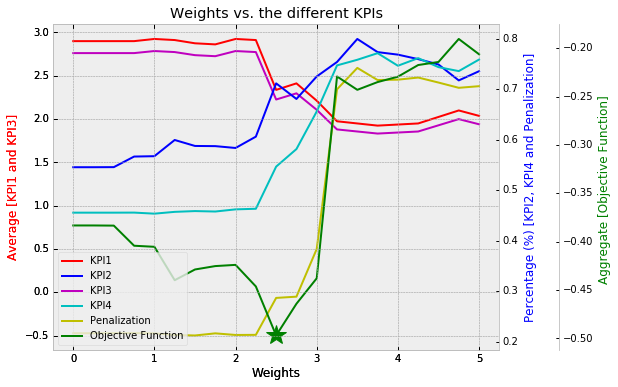

  0%|          | 0/21 [00:00<?, ?it/s]

Current optimal weights are:
[3.75, 2.0, 2.5, 2.0, 4.0, 1.25, 3.75, 4.0, 4.0, 5.0]
Current optimal number of clusters is:
80
Feature 3 is selected for update


100%|██████████| 21/21 [02:42<00:00,  7.75s/it]


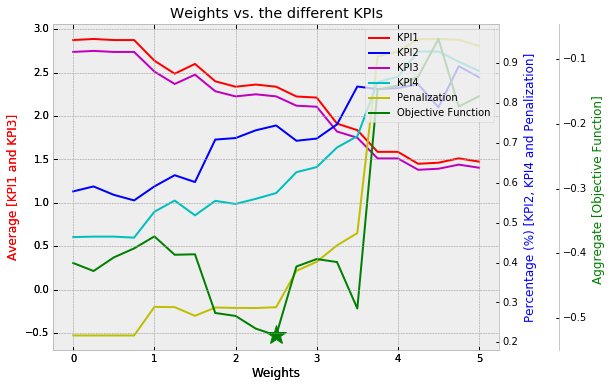

  0%|          | 0/21 [00:00<?, ?it/s]

Current optimal weights are:
[3.75, 2.0, 2.5, 2.5, 4.0, 1.25, 3.75, 4.0, 4.0, 5.0]
Current optimal number of clusters is:
80
Feature 0 is selected for update


100%|██████████| 21/21 [02:48<00:00,  8.01s/it]


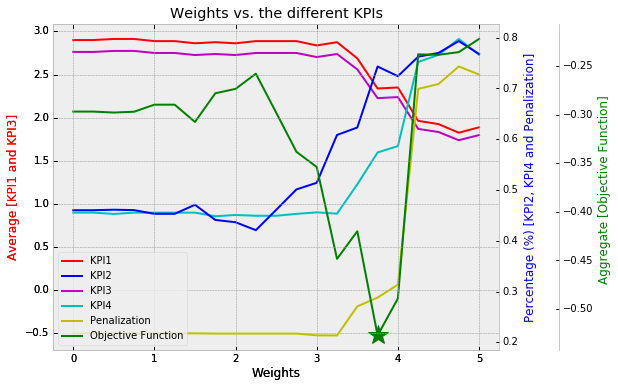

Current optimal weights are:
[3.75, 2.0, 2.5, 2.5, 4.0, 1.25, 3.75, 4.0, 4.0, 5.0]
Current optimal number of clusters is:
80


In [6]:
#Clustering
##Optimization framework
optimal_weights, n_clusters = clustlib.optimization_framework(data=data,
                                                              df=transformed_table,
                                                              clustering_ranges=clustering_ranges,
                                                              warm_start=#([random.uniform(1,4) for i in range(len(clustering_ranges))],int(np.sqrt(transformed_table.shape[0]))),
                                                                         ([3.75, 2.0, 2.75, 2.0, 4.0, 1.25, 3.75, 4.0, 4.0, 5.0],80),
                                                              order='random',
                                                              n_iterations=#2*len(clustering_ranges),
                                                                          3,
                                                              n_clusters_range = [s for s in range(30,95,5)],
                                                              kpi2_weight=-1,
                                                              kpi4_weight=0,
                                                              penalization_weight=0.75,
                                                              affinity='default')

# Moving window framework
## Parameters tuning

Current window: 2016-07-01 00:00:00
Time to compute: 0.01889204978942871
Current window: 2016-07-02 00:00:00
Time to compute: 0.01874709129333496
Current window: 2016-07-03 00:00:00
Time to compute: 0.0160980224609375
Current window: 2016-07-04 00:00:00
Time to compute: 0.01437520980834961
Current window: 2016-07-05 00:00:00
Time to compute: 0.01445913314819336
Current window: 2016-07-06 00:00:00
Time to compute: 0.014677047729492188
Current window: 2016-07-07 00:00:00
Time to compute: 0.014306068420410156
Current window: 2016-07-08 00:00:00
Time to compute: 0.016501188278198242
Current window: 2016-07-09 00:00:00
Time to compute: 0.014559030532836914
Current window: 2016-07-10 00:00:00
Time to compute: 0.016733884811401367
Current window: 2016-07-11 00:00:00
Time to compute: 0.014506816864013672
Current window: 2016-07-12 00:00:00
Time to compute: 0.014570951461791992
Current window: 2016-07-13 00:00:00
Time to compute: 0.015759706497192383
Current window: 2016-07-14 00:00:00
Time to 

Time to compute: 0.014729976654052734
Current window: 2016-11-06 00:00:00
Time to compute: 0.016068220138549805
Current window: 2016-11-07 00:00:00
Time to compute: 0.015316963195800781
Current window: 2016-11-08 00:00:00
Time to compute: 0.014919042587280273
Current window: 2016-11-09 00:00:00
Time to compute: 0.014124870300292969
Current window: 2016-11-10 00:00:00
Time to compute: 0.014320135116577148
Current window: 2016-11-11 00:00:00
Time to compute: 0.014948129653930664
Current window: 2016-11-12 00:00:00
Time to compute: 0.01728200912475586
Current window: 2016-11-13 00:00:00
Time to compute: 0.013911008834838867
Current window: 2016-11-14 00:00:00
Time to compute: 0.013969182968139648
Current window: 2016-11-15 00:00:00
Time to compute: 0.06261014938354492
Current window: 2016-11-16 00:00:00
Time to compute: 0.018779993057250977
Current window: 2016-11-17 00:00:00
Time to compute: 0.017233848571777344
Current window: 2016-11-18 00:00:00
Time to compute: 0.016112089157104492
Cu

Time to compute: 0.02261519432067871
Current window: 2017-02-28 00:00:00
Time to compute: 0.02105712890625
Current window: 2017-03-01 00:00:00
Time to compute: 0.019852161407470703
Current window: 2017-03-02 00:00:00
Time to compute: 0.021715402603149414
Current window: 2017-03-03 00:00:00
Time to compute: 0.022463083267211914
Current window: 2017-03-04 00:00:00
Time to compute: 0.02079296112060547
Current window: 2017-03-05 00:00:00
Time to compute: 0.02270817756652832
Current window: 2017-03-06 00:00:00
Time to compute: 0.02278900146484375
Current window: 2017-03-07 00:00:00
Time to compute: 0.019997358322143555
Current window: 2017-03-08 00:00:00
Time to compute: 0.019955873489379883
Current window: 2017-03-09 00:00:00
Time to compute: 0.019833087921142578
Current window: 2017-03-10 00:00:00
Time to compute: 0.02193307876586914
Current window: 2017-03-11 00:00:00
Time to compute: 0.024544954299926758
Current window: 2017-03-12 00:00:00
Time to compute: 0.022266149520874023
Current w

Time to compute: 0.02454400062561035
Current window: 2017-06-23 00:00:00
Time to compute: 0.022295713424682617
Current window: 2017-06-24 00:00:00
Time to compute: 0.030190229415893555
Current window: 2017-06-25 00:00:00
Time to compute: 0.028247833251953125
Current window: 2017-06-26 00:00:00
Time to compute: 0.023020029067993164
Current window: 2017-06-27 00:00:00
Time to compute: 0.022917985916137695
Current window: 2017-06-28 00:00:00
Time to compute: 0.021696805953979492
Current window: 2017-06-29 00:00:00
Time to compute: 0.02939605712890625
Current window: 2017-06-30 00:00:00
Time to compute: 0.028853178024291992
Current window: 2017-07-01 00:00:00
Time to compute: 0.029863357543945312
Current window: 2017-07-02 00:00:00
Time to compute: 0.030154943466186523
Current window: 2017-07-03 00:00:00
Time to compute: 0.02954888343811035
Current window: 2017-07-04 00:00:00
Time to compute: 0.02207016944885254
Current window: 2017-07-05 00:00:00
Time to compute: 0.02214193344116211
Curre

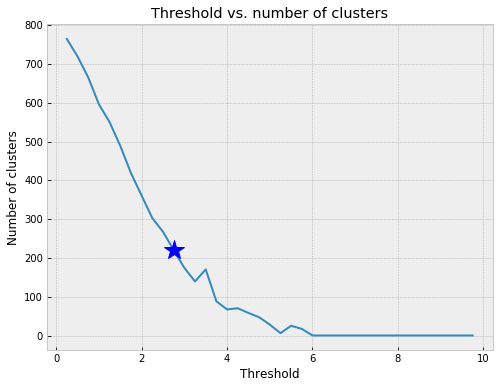

In [7]:
##Moving windows framework
###Global parameters
#optimal outputs
optimal_weights, n_clusters = [3.75, 2.0, 2.75, 2.0, 4.0, 1.25, 3.75, 4.0, 4.0, 5.0], 80


window_size, window_step, order_of_magnitude = (2,0),(0,1),3*n_clusters
algorithm, n_clusters_algorithm = 'hierarchical','birch_variable'

###Optimal threshold for the moving windows framework
optimal_threshold = clustlib.threshold_tuning(data=data,
                                    df=transformed_table,
                                    clustering_ranges=clustering_ranges,
                                    weights=optimal_weights,
                                    algorithm=n_clusters_algorithm,
                                    size=window_size,
                                    step=window_step,
                                    test_range=[0.25 + (s/4) for s in range(39)],
                                    order_of_magnitude=order_of_magnitude,
                                    do_print=True)

## Clustering

Current window: 2016-07-01 00:00:00
Number of clusters in the window: 6
Time to compute :0.017330169677734375
Current window: 2016-07-02 00:00:00
Number of clusters in the window: 6
Time to compute :0.016765117645263672
Current window: 2016-07-03 00:00:00
Number of clusters in the window: 7
Time to compute :0.018108129501342773
Current window: 2016-07-04 00:00:00
Number of clusters in the window: 7
Time to compute :0.01639699935913086
Current window: 2016-07-05 00:00:00
Number of clusters in the window: 7
Time to compute :0.015744924545288086
Current window: 2016-07-06 00:00:00
Number of clusters in the window: 7
Time to compute :0.016761302947998047
Current window: 2016-07-07 00:00:00
Number of clusters in the window: 8
Time to compute :0.019407033920288086
Current window: 2016-07-08 00:00:00
Number of clusters in the window: 8
Time to compute :0.06192612648010254
Current window: 2016-07-09 00:00:00
Number of clusters in the window: 8
Time to compute :0.014783143997192383
Current wind

Time to compute :0.019012928009033203
Current window: 2016-09-18 00:00:00
Number of clusters in the window: 12
Time to compute :0.019147157669067383
Current window: 2016-09-19 00:00:00
Number of clusters in the window: 12
Time to compute :0.02089691162109375
Current window: 2016-09-20 00:00:00
Number of clusters in the window: 12
Time to compute :0.01895594596862793
Current window: 2016-09-21 00:00:00
Number of clusters in the window: 12
Time to compute :0.018622398376464844
Current window: 2016-09-22 00:00:00
Number of clusters in the window: 12
Time to compute :0.01903820037841797
Current window: 2016-09-23 00:00:00
Number of clusters in the window: 12
Time to compute :0.01758599281311035
Current window: 2016-09-24 00:00:00
Number of clusters in the window: 11
Time to compute :0.018151044845581055
Current window: 2016-09-25 00:00:00
Number of clusters in the window: 11
Time to compute :0.018211841583251953
Current window: 2016-09-26 00:00:00
Number of clusters in the window: 11
Time 

Number of clusters in the window: 35
Time to compute :0.025390148162841797
Current window: 2016-12-08 00:00:00
Number of clusters in the window: 37
Time to compute :0.024739980697631836
Current window: 2016-12-09 00:00:00
Number of clusters in the window: 41
Time to compute :0.025075912475585938
Current window: 2016-12-10 00:00:00
Number of clusters in the window: 41
Time to compute :0.029282808303833008
Current window: 2016-12-11 00:00:00
Number of clusters in the window: 42
Time to compute :0.027508974075317383
Current window: 2016-12-12 00:00:00
Number of clusters in the window: 42
Time to compute :0.026207923889160156
Current window: 2016-12-13 00:00:00
Number of clusters in the window: 42
Time to compute :0.025574922561645508
Current window: 2016-12-14 00:00:00
Number of clusters in the window: 45
Time to compute :0.0280148983001709
Current window: 2016-12-15 00:00:00
Number of clusters in the window: 47
Time to compute :0.03187417984008789
Current window: 2016-12-16 00:00:00
Numb

Number of clusters in the window: 118
Time to compute :0.10735106468200684
Current window: 2017-02-22 00:00:00
Number of clusters in the window: 120
Time to compute :0.10740995407104492
Current window: 2017-02-23 00:00:00
Number of clusters in the window: 122
Time to compute :0.11526298522949219
Current window: 2017-02-24 00:00:00
Number of clusters in the window: 122
Time to compute :0.12000513076782227
Current window: 2017-02-25 00:00:00
Number of clusters in the window: 124
Time to compute :0.1255507469177246
Current window: 2017-02-26 00:00:00
Number of clusters in the window: 123
Time to compute :0.1295609474182129
Current window: 2017-02-27 00:00:00
Number of clusters in the window: 124
Time to compute :0.13114428520202637
Current window: 2017-02-28 00:00:00
Number of clusters in the window: 124
Time to compute :0.12084102630615234
Current window: 2017-03-01 00:00:00
Number of clusters in the window: 119
Time to compute :0.12128591537475586
Current window: 2017-03-02 00:00:00
Num

Number of clusters in the window: 168
Time to compute :0.2324080467224121
Current window: 2017-05-07 00:00:00
Number of clusters in the window: 166
Time to compute :0.2370603084564209
Current window: 2017-05-08 00:00:00
Number of clusters in the window: 165
Time to compute :0.24113678932189941
Current window: 2017-05-09 00:00:00
Number of clusters in the window: 161
Time to compute :0.21903586387634277
Current window: 2017-05-10 00:00:00
Number of clusters in the window: 165
Time to compute :0.22719216346740723
Current window: 2017-05-11 00:00:00
Number of clusters in the window: 156
Time to compute :0.2391796112060547
Current window: 2017-05-12 00:00:00
Number of clusters in the window: 160
Time to compute :0.2461090087890625
Current window: 2017-05-13 00:00:00
Number of clusters in the window: 166
Time to compute :0.25470423698425293
Current window: 2017-05-14 00:00:00
Number of clusters in the window: 163
Time to compute :0.257580041885376
Current window: 2017-05-15 00:00:00
Number 

Number of clusters in the window: 233
Time to compute :0.6275131702423096
Current window: 2017-07-21 00:00:00
Number of clusters in the window: 238
Time to compute :0.642071008682251
Current window: 2017-07-22 00:00:00
Number of clusters in the window: 230
Time to compute :0.6141550540924072
Current window: 2017-07-23 00:00:00
Number of clusters in the window: 234
Time to compute :0.6768770217895508
Current window: 2017-07-24 00:00:00
Number of clusters in the window: 234
Time to compute :0.6808891296386719
Current window: 2017-07-25 00:00:00
Number of clusters in the window: 232
Time to compute :0.6646857261657715
Current window: 2017-07-26 00:00:00
Number of clusters in the window: 231
Time to compute :0.6672530174255371
Current window: 2017-07-27 00:00:00
Number of clusters in the window: 223
Time to compute :0.8535401821136475
Current window: 2017-07-28 00:00:00
Number of clusters in the window: 227
Time to compute :0.7983057498931885
Current window: 2017-07-29 00:00:00
Number of c

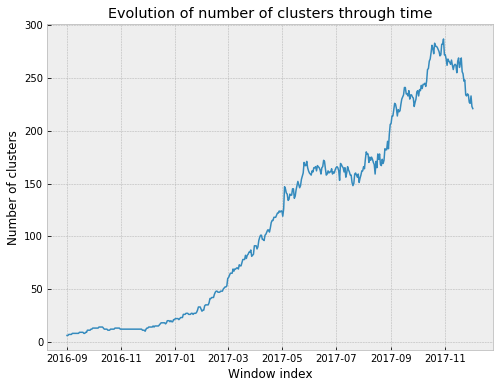

In [8]:
###Perform the clustering
clustering_results, start_window, end_window, anchor = clustlib.moving_windows_framework(data=data,
                                                                                         df=transformed_table,
                                                                                         clustering_ranges=clustering_ranges,
                                                                                         weights=optimal_weights,
                                                                                         size=window_size,
                                                                                         step=window_step,
                                                                                         algorithm=algorithm,
                                                                                         n_clusters_algorithm=n_clusters_algorithm,
                                                                                         threshold=optimal_threshold,
                                                                                         compute_centroids=True,
                                                                                         do_print=True,
                                                                                         do_plot=True)

## Storing windows

In [9]:
#Tracking path (range to be tracked)
tracking_path = (0,457)

##Windows dictionary
windows = explib.map_windows(transformed_table,
                             start_window,
                             end_window,
                             clustering_results,
                             tracking_path)

100%|██████████| 458/458 [00:29<00:00, 15.44it/s]


## Results Exploration

Computing KPI1 over time
Computing KPI2 over time
Computing KPI3 over time
Computing KPI4 over time
Computing Penalization over time


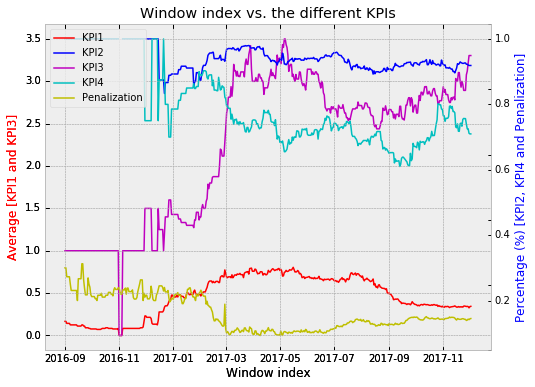

100%|██████████| 458/458 [00:22<00:00, 20.04it/s]


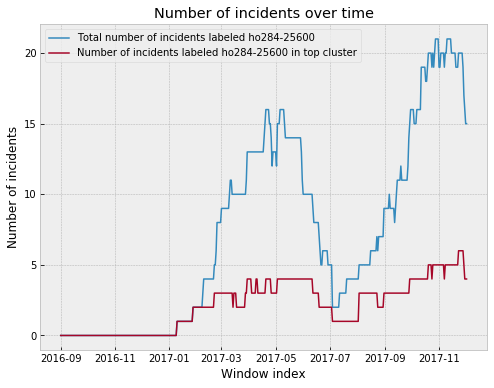

100%|██████████| 458/458 [00:23<00:00, 19.13it/s]


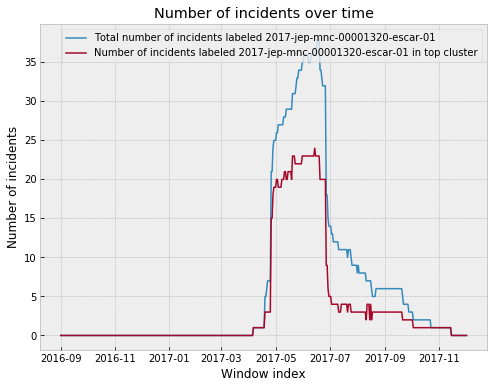

100%|██████████| 458/458 [00:25<00:00, 18.25it/s]


100%|██████████| 458/458 [00:23<00:00, 19.30it/s]


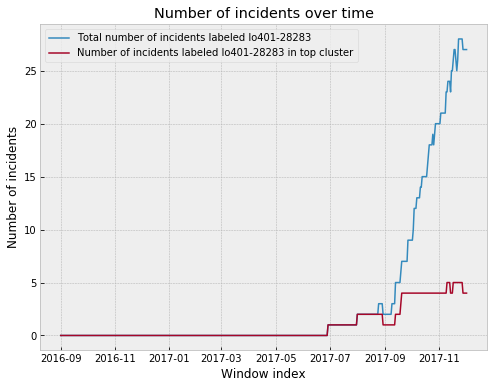

100%|██████████| 458/458 [00:22<00:00, 20.22it/s]


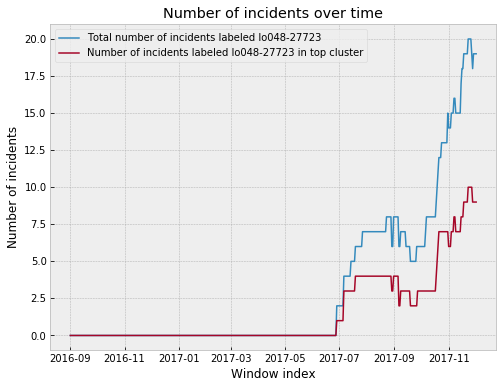

100%|██████████| 458/458 [00:23<00:00, 19.54it/s]


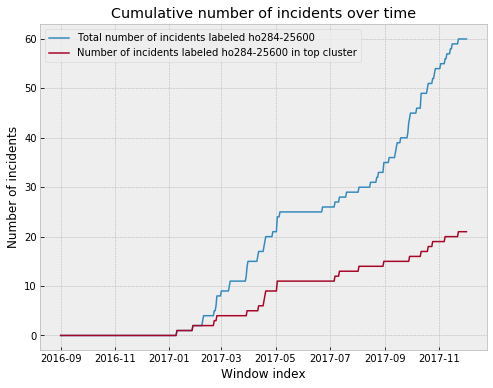

100%|██████████| 458/458 [00:23<00:00, 19.26it/s]


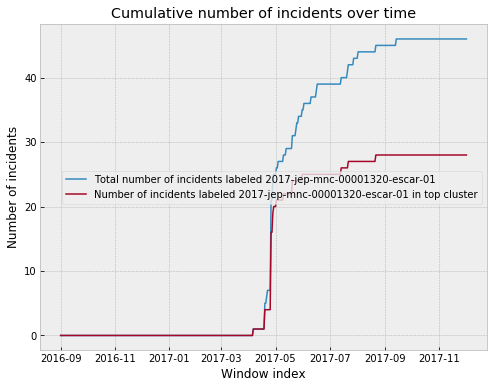

100%|██████████| 458/458 [00:23<00:00, 19.29it/s]


100%|██████████| 458/458 [00:23<00:00, 19.32it/s]


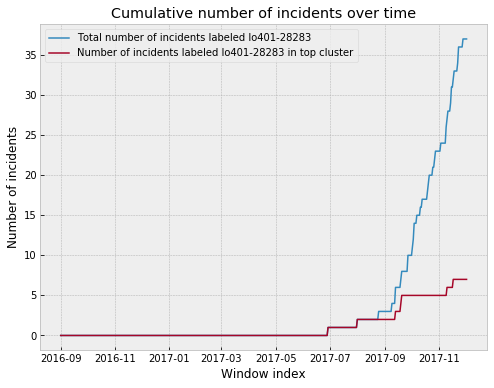

100%|██████████| 458/458 [00:24<00:00, 18.56it/s]


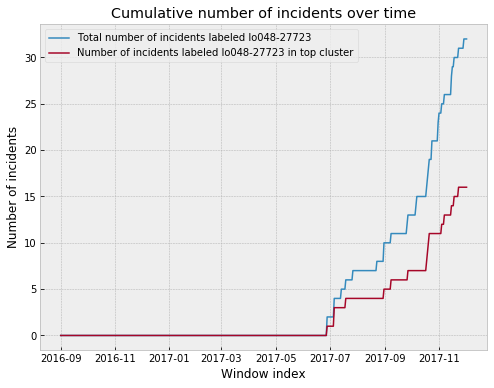

100%|██████████| 458/458 [00:01<00:00, 331.95it/s]


100%|██████████| 458/458 [00:01<00:00, 408.11it/s]


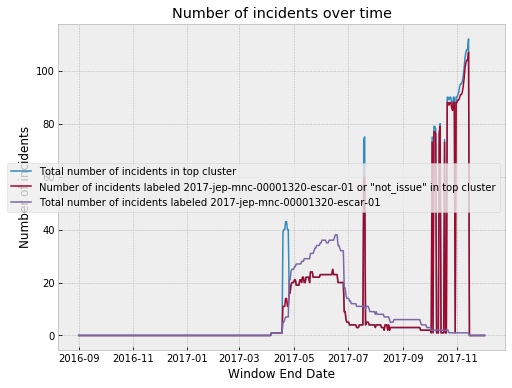

100%|██████████| 458/458 [00:01<00:00, 367.59it/s]


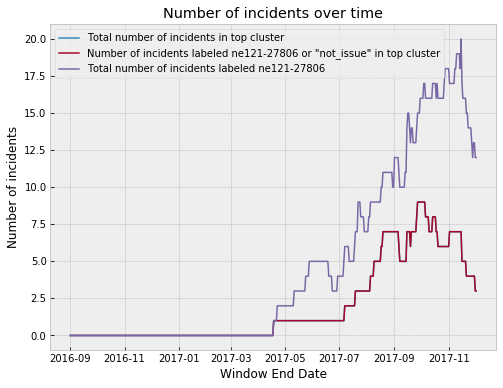

100%|██████████| 458/458 [00:01<00:00, 397.66it/s]


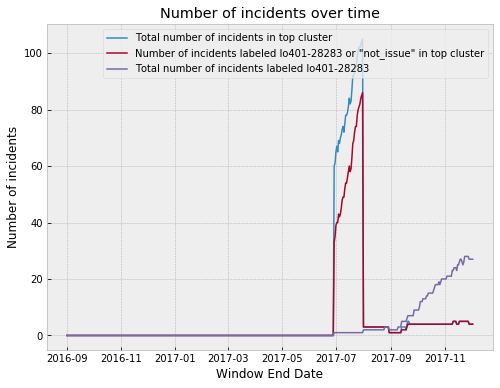

100%|██████████| 458/458 [00:01<00:00, 341.99it/s]


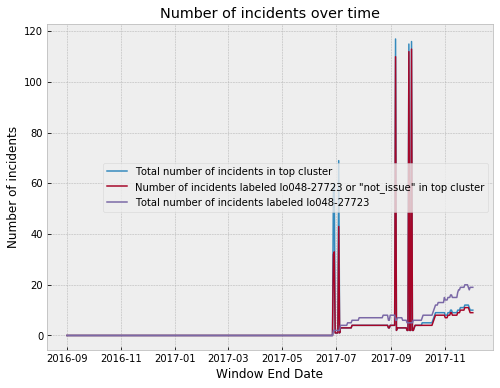

100%|██████████| 458/458 [00:01<00:00, 311.37it/s]


100%|██████████| 458/458 [00:01<00:00, 391.96it/s]


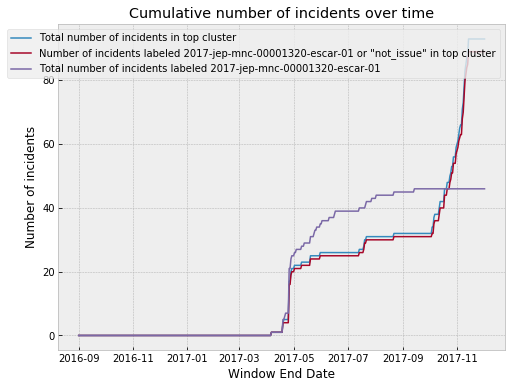

100%|██████████| 458/458 [00:01<00:00, 372.53it/s]


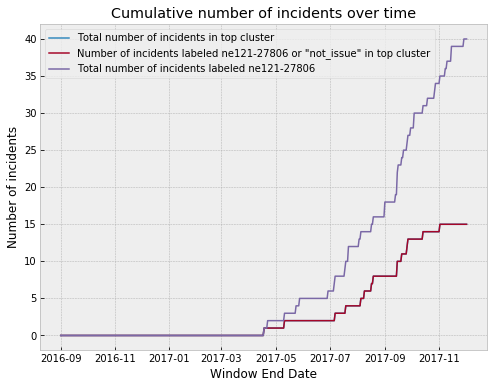

100%|██████████| 458/458 [00:01<00:00, 418.56it/s]


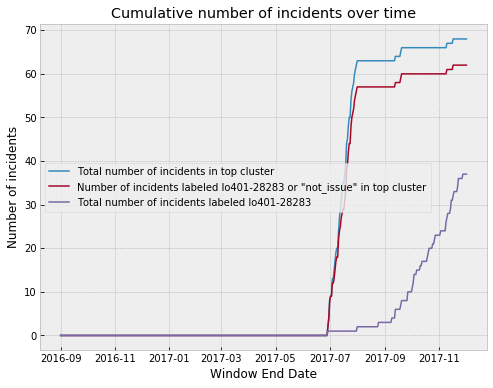

100%|██████████| 458/458 [00:01<00:00, 393.06it/s]


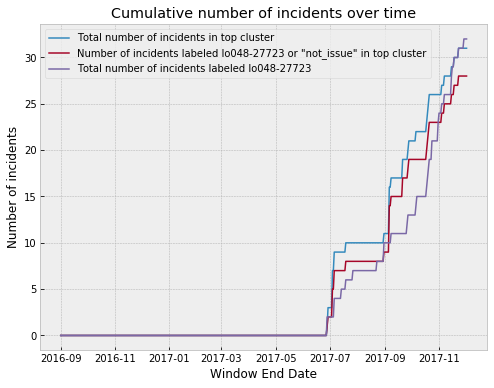

In [11]:
##Plot KPIs
###All-in-one
explib.moving_kpis(transformed_table,
                   start_window,end_window,
                   clustering_results,
                   tracking_path,
                   windows=windows,
                   combine_plots=True,
                   kpi2_threshold=0,
                   kpi3_threshold=0,
                   kpi4_threshold=0)

#top issues 
top_issues = transformed_table['INCDT_ISSUE_LABEL'].value_counts()[2:7].index

##Clustering capture ratio
for tracked_issue in top_issues:
    explib.clustering_capture_ratio(transformed_table,
                                    start_window,
                                    end_window,
                                    clustering_results,
                                    tracking_path,
                                    tracked_issue,
                                    windows,
                                    include_not_issue=False,
                                    cumulative=False,
                                    alternative_cumulative=False,
                                    date_col_name='EARLIEST_RECORD_DATE')

###Cumulative
for tracked_issue in top_issues:
    explib.clustering_capture_ratio(transformed_table,
                                    start_window,
                                    end_window,
                                    clustering_results,
                                    tracking_path,
                                    tracked_issue,
                                    windows, 
                                    cumulative=True,
                                    alternative_cumulative=True)

##Clustering purity ratio
for tracked_issue in top_issues:
    explib.clustering_purity_ratio(transformed_table,
                                   start_window,
                                   end_window,
                                   clustering_results,
                                   tracking_path,
                                   tracked_issue,
                                   windows)

###Cumulative
for tracked_issue in top_issues:
    explib.clustering_purity_ratio(transformed_table,
                                   start_window,
                                   end_window,
                                   clustering_results,
                                   tracking_path,
                                   tracked_issue,
                                   windows,
                                   plot_issue_scale=True,
                                   cumulative=True, 
                                   alternative_cumulative=True)

# Tracking and universal windows framework

In [12]:
#Universal tracking

#Perform universal clustering 
universal_ids,universal_labels,universal_anchor = clustlib.get_universal_ids(windows,
                                                                             anchor,
                                                                             clustering_results,
                                                                             tracking_path=tracking_path,
                                                                             tracking_type='reversed_hybrid',
                                                                             centroids_threshold=5.0,
                                                                             count_threshold=0.6,
                                                                             allow_duplicates=True,
                                                                             reassign_duplicates=True)

#Get new clustering_results
transformed_results = clustlib.transform_clustering_results(clustering_results,
                                                            universal_ids,
                                                            tracking_path=tracking_path) 
      
#Get new windows
universal_windows = explib.map_windows(transformed_table,
                                       start_window,
                                       end_window,
                                       transformed_results,
                                       tracking_path)

100%|██████████| 458/458 [05:18<00:00,  1.44it/s]


# Detection 
## Definition 1: detection plots

100%|██████████| 458/458 [00:26<00:00, 17.54it/s]


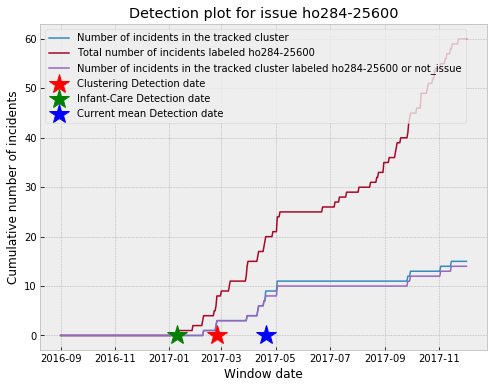

  7%|▋         | 32/458 [00:00<00:01, 318.10it/s]

-45 days, 0:00:00


100%|██████████| 458/458 [00:25<00:00, 17.93it/s]


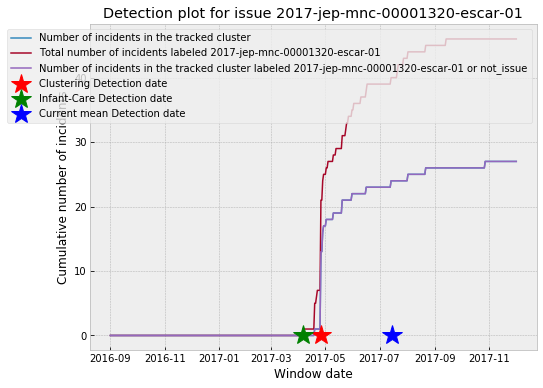

  7%|▋         | 34/458 [00:00<00:01, 334.02it/s]

-20 days, 0:00:00


100%|██████████| 458/458 [00:25<00:00, 17.69it/s]


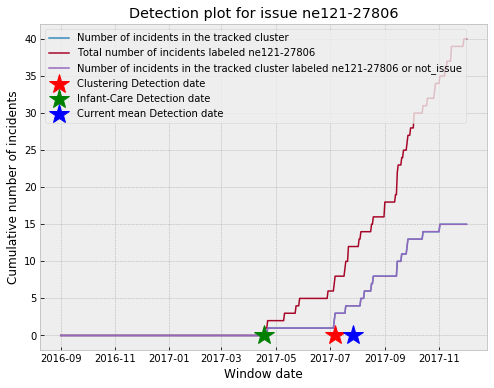

  8%|▊         | 35/458 [00:00<00:01, 344.02it/s]

-80 days, 0:00:00


100%|██████████| 458/458 [00:24<00:00, 18.47it/s]


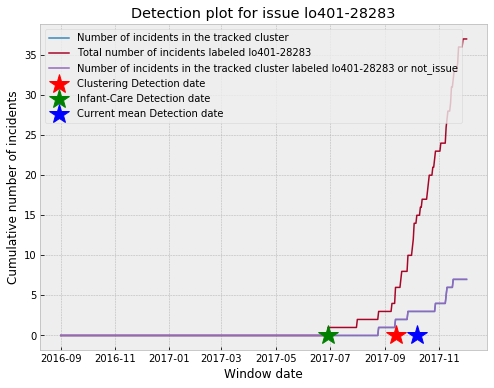

  7%|▋         | 33/458 [00:00<00:01, 329.35it/s]

-76 days, 0:00:00


100%|██████████| 458/458 [00:25<00:00, 17.87it/s]


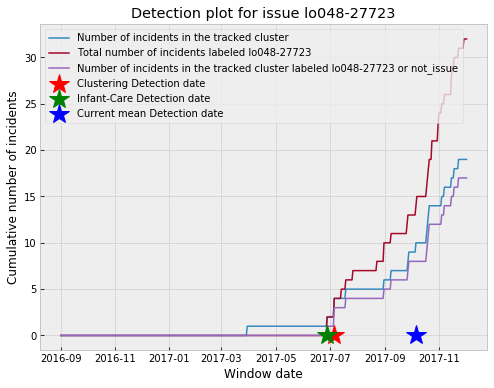

-8 days, 0:00:00


In [13]:
#Plot detection dates (defintion 1)
for tracked_issue in top_issues:
    _,_,_ = explib.detection_plot(transformed_table, 
                                    tracked_issue,
                                    universal_windows,
                                    tracking_path,
                                    start_window,
                                    end_window,
                                    clustering_results,
                                    anchor)

## Definition 2: flags

In [ ]:
##List to keep in the flagged clusters
column_list =  ['ID',
                'INCDT_ISSUE_LABEL',
                'REL_CMP_FAIL_CODE_LIST',
                'GREEN_WRENCH_FAULT_CODE_LIST',
                'REL_OEM_NAME',
                'GREEN_WRENCH_NUM_LIST',
                'REL_ANALYSIS_RATE_CAT',
                'REL_CMP_ENGINE_MILES_LIST',
                'REL_CMP_FAIL_DATE_LIST',
                'REL_CMP_SUM_NET_AMOUNT']
    
#Get the flags for this set-up
flags_list, issue_detect_times, flags_dataframes = explib.describe_flags(universal_ids,
                                                                         universal_windows,
                                                                         tracking_path,
                                                                         column_list,
                                                                         end_window,
                                                                         flag_threshold=5)

In [20]:
from collections import Counter
Counter(flags_list)

Counter({'2017-jep-mnc-00001320-escar-01': 3,
         '2017-jep-mnc-00004149-iscar-01': 1,
         '2017-mpt-mnc-00000566-iscar-01': 1,
         '504507': 2,
         'amyr-ak4qpf': 17,
         'flagged 2+ issues': 53,
         'gp716-27472': 1,
         'gp716-27473': 1,
         'ho284-25600': 5,
         'jz327-25890': 1,
         'lo048-27717': 2,
         'lo048-27723': 1,
         'lo401-28283': 3,
         'lt914-26868': 1,
         'mf943-19819': 1,
         'mq007-26346': 2,
         'mq007-28013': 2,
         'ne121-27483': 1,
         'ne121-27806': 2,
         'not_flagged': 440,
         'not_issue': 30,
         'ou006-27316': 2})

# Reviewing strategy
## Run framework

In [1]:
#Reviews
top_issues = transformed_table['INCDT_ISSUE_LABEL'].value_counts()[1:21].index
n_new_incidents_per_window, n_reviewed_incidents_per_window, ids_reviewed_incidents, \
    ids_sampled_incidents, detail_review_info, issue_detection_date, detection_date_df = \
    clustlib.describe_reviews(transformed_table,
                     universal_anchor,
                     universal_labels,
                     clustering_features,
                     clustering_ranges,
                     optimal_weights,
                     universal_windows,
                     tracking_path,
                     0.2, 
                     end_window = end_window, 
                     top_issues = top_issues)

print(detection_date_df)

NameError: name 'transformed_table' is not defined

In [22]:
detection_date_df.shape

(5, 8)

## Descriptive statistics and deep-dive

In [23]:
print(detection_date_df)

###Use examples
##Detection date for top 20 issues
transformed_table.query('INCDT_ISSUE_LABEL in @top_issues').groupby('INCDT_ISSUE_LABEL')['EARLIEST_RECORD_DATE'].min() - transformed_table.query('ID in @ids_reviewed_incidents').query('INCDT_ISSUE_LABEL in @top_issues').groupby('INCDT_ISSUE_LABEL')['EARLIEST_RECORD_DATE'].min()

##% of total issues detected
zero = datetime.datetime(2000,1,1)-datetime.datetime(2000,1,1)
((transformed_table.groupby('INCDT_ISSUE_LABEL')['EARLIEST_RECORD_DATE'].min() - transformed_table.query('ID in @ids_reviewed_incidents').groupby('INCDT_ISSUE_LABEL')['EARLIEST_RECORD_DATE'].min()) <= zero).sum()/len((transformed_table.groupby('INCDT_ISSUE_LABEL')['EARLIEST_RECORD_DATE'].min()))

                INCDT_ISSUE_LABEL EARLIEST_INDICATION_DATE  \
0  2017-jep-mnc-00001320-escar-01               2017-03-30   
1                     ho284-25600               2016-12-30   
2                     lo048-27723               2017-06-19   
3                     lo401-28283               2017-06-06   
4                     ne121-27806               2017-04-12   

  EARLIEST_RECORD_DATE      ID Reviewing_Detection_Date  \
0           2017-04-05  161445               2017-04-06   
1           2017-01-09  468646               2017-01-10   
2           2017-06-27  360932               2017-06-28   
3           2017-06-28   45852               2017-06-29   
4           2017-04-17   80513               2017-04-18   

   Detection_Incident_ID  Number_of_Incidents  \
0                 161445                   46   
1                 468646                   60   
2                 360932                   32   
3                  45852                   37   
4                  80513   

0.61176470588235299

# Visualization
## Choose clusters and compute the 2D T-SNE project

In [ ]:
#2D T-SNE demo
##Get top 50 clusters
top_clusters = explib.get_top_clusters(tracking_path,
                                transformed_results,
                                n=50)   

#Compute the feature matrix in 2D with T-SNE
X_transformed, transformed_table = explib.tsne_results(transformed_table,
                                                clustering_features,
                                                clustering_ranges,
                                                optimal_weights)

# Display the demo and save into an html file

In [ ]:
explib.display_2D_demo(top_clusters,
                       universal_windows,
                       tracking_path,
                       X_transformed,
                       transformed_table,
                       end_window,
                       frames=2,
                       size=7,
                       filename='demo.html')